In [3]:
from result_records import DataFrameLoader

DENSE_SMALL = '/mnt/ssd-1/transformer-memorization/memorization_results_dense_small.csv'
DENSE_MEDIUM = '/mnt/ssd-1/transformer-memorization/memorization_results_dense_medium.csv'
DENSE_LARGE = '/mnt/ssd-1/transformer-memorization/memorization_results_dense_large.csv'

In [6]:
ds = DataFrameLoader(DENSE_LARGE)

# Loading Data 

In [28]:
data = []
import tensorflow as tf
indicies = []
import numpy as np
from tqdm import tqdm
recind = 0
for i,(idx,res) in tqdm(enumerate(ds)):
    if(not (np.isnan(res) or np.isinf(res))):
        data.append(res)
        indicies.append(idx)
    recind = idx


36608it [00:00, 110562.56it/s]


# Memorization Metric plots
> Plotting average values of memorization metric over a bucketed range of values

In [29]:
data = np.array(data)
indicies = np.array(indicies)

In [30]:
# Run these if you don't see UI for the plots and refresh the page
#!pip install --upgrade jupyter_core jupyter_client
#!jupyter nbextension enable --py widgetsnbextension

In [31]:
from IPython.display import display
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib inline

import numpy as np

class Plotter:
    def __init__(self,title,xlabel,ylabel,y,x=None,size=25,default_slider_value=None):
        self.title = title
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.default_slider_value = default_slider_value
        self.y = y
        self.x = x
        if(x is None):
            self.x = [i for i in range(len(data))]
        
        self.size = 25
        self.params = {'legend.fontsize': 'large',
          'figure.figsize': (15,5),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25,
          'font.family':'sans-serif',
          'font.weight':'bold',
          'text.color':'aqua'
         }
    
    def plot_data(self,scale):
        scale = 2**scale  #Converting log scale to normal scale
        buckets = []
        length = len(self.y)
        bucket_size = length//scale
        index = []

    
        for i in range(0,length,bucket_size):
            buckets.append(self.y[i:i+bucket_size].mean())
            index.append(self.x[min(i+bucket_size-1,len(indicies)-1)])

        plt.plot(index,buckets)
        plt.rcParams.update(self.params)
        plt.title(self.title)
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        plt.show()
    
    def clicked(self,b):
        self.out.clear_output()
        scale = self.slider.value
        with self.out:
            self.plot_data(scale)
    def run(self):
        self.out = widgets.Output()
        button = widgets.Button(description="Plot Value")
        slider_max = int(np.log2(len(self.y)))
        
        if(self.default_slider_value is not None):
            default_slider_value = self.default_slider_value
        else:
            default_slider_value = np.random.choice([i for i in range(1,slider_max)])
        self.slider = widgets.IntSlider(min=1, max=slider_max, 
                                   value=default_slider_value,
                                   description="Precision",
                                   layout=widgets.Layout(width='50%'))

        box_layout = widgets.Layout(
            display='flex',
            flex_flow='column',
            align_items='center',
            width='80%'
        )

        box = widgets.VBox(
            [
                self.out,
                self.slider,
                button
            ],
            layout=box_layout
        )

        

        with self.out:    
            self.plot_data(default_slider_value)
        button.on_click(self.clicked)
        display(box)
    
plotter = Plotter(title="Memorization Metric",
                  xlabel='Index',ylabel='NLL Loss',
                  x=indicies,y=data)
plotter.run() #Refresh if you donot see UI

# Correlation

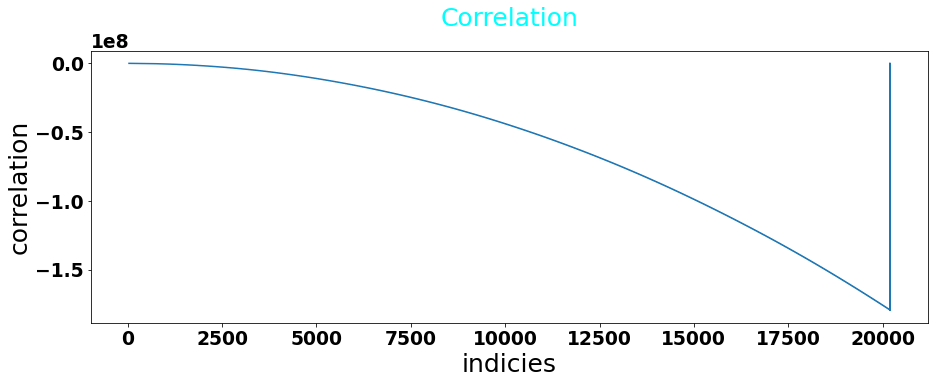

In [15]:
from scipy import signal

correlation = signal.correlate(indicies, data, mode="full")
plotter = Plotter(xlabel='indicies',ylabel='correlation',
                  title='Correlation',x=indicies,y=correlation,default_slider_value=11)
plotter.run()

# Statistics

In [16]:
import matplotlib.pyplot as plt

SAMPLE_VALUE = len(data)*25//100
from sklearn.metrics import r2_score
r2 = r2_score(indicies,data)
print(f"R2 Score between indicies and data: {r2:.5f}")
avg_start = data[:SAMPLE_VALUE].mean()
avg_end = data[SAMPLE_VALUE:].mean()

var_start = data[:SAMPLE_VALUE].var()
var_end = data[SAMPLE_VALUE:].var()
print(f"Average NLL Loss changed from {avg_start:.5f} to {avg_end:.5f}")
print(f"Varience of  NLL Loss changed from {var_start:.5f} to {var_end:.5f}")
print("Trend of very slight improvement continues")

R2 Score between indicies and data: -3.01461
Average NLL Loss changed from -7.14968 to -7.04458
Varience of  NLL Loss changed from 14.05013 to 13.72669
Trend of very slight improvement continues
